<a href="https://colab.research.google.com/github/javierdealba/inmobibot/blob/main/Avance1_26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Análisis exploratorio de los datos

En este documento se analizaran de manera general los datos.


In [1]:
import pandas as pd

propiedades = pd.read_csv("listado_propiedades.csv")

# Tipos de datos

propiedades.dtypes

alias                  object
direccion              object
tipo_de_propiedad      object
amueblado              object
niveles               float64
recamaras             float64
banos                 float64
medios_banos          float64
cuarto_de_servicio    float64
estacionamientos      float64
terreno               float64
frente                float64
fondo                 float64
construccion          float64
forma                  object
uso_de_suelo           object
relieve                object
precio                  int64
mantenimiento           int64
estado                 object
antiguedad              int64
gravamen               object
descripcion            object
dtype: object

## Descripción de los datos

En la siguiente sección se hace una descriçión general de los datos. Se eliminan las columnas de texto descriptivo, las cuales se utilizarán solo en el RAG. Se hará análisis de los features cualitativos y cuantitativos.

### Datos cuantitativos

In [2]:
# Se descartarán columnas para este análisis
columnas_descartables = ["direccion", "descripcion"]
propiedades_filtradas = propiedades.drop(columnas_descartables, axis=1)

propiedades_filtradas.describe()

,niveles,recamaras,banos,medios_banos,cuarto_de_servicio,estacionamientos,terreno,frente,fondo,construccion,precio,mantenimiento,antiguedad
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,44.000000,32.000000,30.000000,28.000000,4.400000e+01,44.000000,44.000000
mean,1.964286,3.285714,2.142857,1.071429,0.392857,2.571429,2512.457045,25.981250,37.654000,231.447500,9.618051e+06,482.500000,7.886364
std,0.744468,2.241976,1.353029,2.417966,0.566947,2.949307,6612.039024,39.014178,63.289635,182.050357,1.476650e+07,1732.778552,13.487662
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,57.930000,4.300000,2.910000,67.500000,3.788000e+05,0.000000,0.000000
25%,2.000000,2.750000,1.000000,0.000000,0.000000,1.000000,111.125000,7.097500,16.035000,99.567500,2.037500e+06,0.000000,0.000000
50%,2.000000,3.000000,2.000000,1.000000,0.000000,2.000000,222.250000,9.820000,20.795000,198.400000,4.487748e+06,0.000000,0.000000
75%,2.000000,4.000000,3.000000,1.000000,1.000000,2.250000,649.897500,20.842500,28.865000,244.250000,1.055000e+07,32.500000,11.000000
max,3.000000,13.000000,5.000000,13.000000,2.000000,16.000000,28238.110000,166.100000,334.000000,876.000000,6.200000e+07,11300.000000,45.000000


### Datos cualitativos

In [3]:
propiedades_filtradas.describe(include='object')

,alias,tipo_de_propiedad,amueblado,forma,uso_de_suelo,relieve,estado,gravamen
count,44,44,1,44,44,44,44,44
unique,42,6,1,2,7,1,3,2
top,Capital Norte Coto Carrara,casa,si,regular,habitacional,plano,excelente,no
freq,2,18,1,43,25,44,29,36


### Datos nulos

In [4]:
propiedades_filtradas.isna().sum()

alias                  0
tipo_de_propiedad      0
amueblado             43
niveles               16
recamaras             16
banos                 16
medios_banos          16
cuarto_de_servicio    16
estacionamientos      16
terreno                0
frente                12
fondo                 14
construccion          16
forma                  0
uso_de_suelo           0
relieve                0
precio                 0
mantenimiento          0
estado                 0
antiguedad             0
gravamen               0
dtype: int64

En este caso no conviene llenar los datos nulos con otros vwalores, ya que no aplican, lo que se hará será separar por el tipo de propiedades.

In [5]:
propiedades_filtradas["tipo_de_propiedad"].unique()

array(['casa', 'departamento', 'local', 'casa, oficina',
       'plaza comercial', 'terreno'], dtype=object)

Las casas usan todos los datos, por lo que no se filtran las variables

In [6]:
casas = propiedades_filtradas[propiedades_filtradas["tipo_de_propiedad"].isin(["casa", "casa, oficina"])]
casas.isnull().sum()

alias                  0
tipo_de_propiedad      0
amueblado             19
niveles                0
recamaras              0
banos                  0
medios_banos           0
cuarto_de_servicio     0
estacionamientos       0
terreno                0
frente                 0
fondo                  0
construccion           0
forma                  0
uso_de_suelo           0
relieve                0
precio                 0
mantenimiento          0
estado                 0
antiguedad             0
gravamen               0
dtype: int64

Los departamentos no cuentan con frente ni fondo, por lo que se filtran

In [7]:
departamentos = propiedades_filtradas[propiedades_filtradas["tipo_de_propiedad"] == "departamento"]
departamentos.isna().sum()

alias                 0
tipo_de_propiedad     0
amueblado             5
niveles               0
recamaras             0
banos                 0
medios_banos          0
cuarto_de_servicio    0
estacionamientos      0
terreno               0
frente                6
fondo                 6
construccion          0
forma                 0
uso_de_suelo          0
relieve               0
precio                0
mantenimiento         0
estado                0
antiguedad            0
gravamen              0
dtype: int64

In [8]:
columnas_descartables = ["frente", "fondo"]
departamentos = departamentos.drop(columnas_descartables, axis=1)
departamentos

,alias,tipo_de_propiedad,amueblado,niveles,recamaras,banos,medios_banos,cuarto_de_servicio,estacionamientos,terreno,construccion,forma,uso_de_suelo,relieve,precio,mantenimiento,estado,antiguedad,gravamen
18,Distrito Chapultepec,departamento,NaN,1.0,3.0,2.0,0.0,0.0,1.0,95.66,95.66,regular,habitacional,plano,5740000,0,excelente,3,no
19,Lobby 33,departamento,si,1.0,3.0,3.0,1.0,1.0,2.0,217.50,217.50,regular,habitacional,plano,19500000,11300,excelente,3,no
20,Paseos del Sol,departamento,NaN,1.0,2.0,1.0,0.0,0.0,1.0,78.39,78.39,regular,habitacional,plano,2650000,0,bueno,40,no
21,RVT W-1106 Penthouse,departamento,NaN,1.0,3.0,3.0,0.0,1.0,3.0,192.00,192.00,regular,habitacional,plano,11200000,0,excelente,2,no
22,Toren 54 Loft B,departamento,NaN,2.0,1.0,1.0,1.0,0.0,1.0,73.82,73.82,regular,habitacional,plano,4394000,0,excelente,0,no
23,Bitloft,departamento,NaN,2.0,2.0,2.0,0.0,2.0,1.0,57.93,88.24,regular,"habitacional, comercial y turistico",plano,4070009,1350,excelente,0,no


Los terrenos tienen varias variables a quitar, y de momento no se llenarán los valores incompletos de frente y fondo.

In [9]:
terrenos = propiedades_filtradas[propiedades_filtradas["tipo_de_propiedad"] == "terreno"]
terrenos.isna().sum()

alias                  0
tipo_de_propiedad      0
amueblado             16
niveles               16
recamaras             16
banos                 16
medios_banos          16
cuarto_de_servicio    16
estacionamientos      16
terreno                0
frente                 4
fondo                  6
construccion          16
forma                  0
uso_de_suelo           0
relieve                0
precio                 0
mantenimiento          0
estado                 0
antiguedad             0
gravamen               0
dtype: int64

In [10]:
columnas_descartables = ["niveles", "recamaras", "banos", "medios_banos", "cuarto_de_servicio", "estacionamientos", "construccion"]
terrenos = terrenos.drop(columnas_descartables, axis=1)
terrenos

,alias,tipo_de_propiedad,amueblado,terreno,frente,fondo,forma,uso_de_suelo,relieve,precio,mantenimiento,estado,antiguedad,gravamen
28,"Boskania, Atemajac de Brizuela",terreno,NaN,838.59,11.60,NaN,regular,"habitacional, turistico",plano,747000,0,excelente,0,no
29,Chapala,terreno,NaN,27958.00,140.00,43.95,regular,"comercial, habitacional",plano,56700000,0,excelente,0,no
30,Ixtlahuacan,terreno,NaN,10650.00,NaN,NaN,regular,"comercial, habitacional, turistico",plano,11000000,0,bueno,0,no
31,"La vista, lote 3",terreno,NaN,200.82,8.84,2.91,regular,habitacional,plano,2900000,1600,excelente,0,no
32,Sierra Mazati Tapalpa,terreno,NaN,6127.00,NaN,NaN,regular,"habitacional, turistico",plano,1500000,0,excelente,0,no
33,Mazati Villa Oyamel,terreno,NaN,2500.00,48.80,67.06,regular,"habitacional, turistico",plano,1000000,500,excelente,0,no
34,Puerto Vallarta,terreno,NaN,227.00,NaN,NaN,regular,"habitacional, turistico",plano,5500000,0,excelente,13,no
35,El Alamo,terreno,NaN,3299.00,29.85,25.46,regular,"comercial, habitacional, turistico",plano,62000000,0,bueno,0,no
36,San Jose El Quince,terreno,NaN,240.00,8.00,30.00,regular,"comercial, habitacional",plano,500000,0,bueno,0,no
37,Santa Cruz de la Loma,terreno,NaN,280.04,20.44,13.70,regular,comercial,plano,776000,0,excelente,0,no


En los locales y plazas comerciales de momento tampoco se llenarán los valores incompletos de frente y fondo, se buscará investigar los datos reales o no usarlos.

In [11]:
locales = propiedades_filtradas[propiedades_filtradas["tipo_de_propiedad"].isin(["local", "plaza comercial"])]
locales.isnull().sum()

alias                 0
tipo_de_propiedad     0
amueblado             3
niveles               0
recamaras             0
banos                 0
medios_banos          0
cuarto_de_servicio    0
estacionamientos      0
terreno               0
frente                2
fondo                 2
construccion          0
forma                 0
uso_de_suelo          0
relieve               0
precio                0
mantenimiento         0
estado                0
antiguedad            0
gravamen              0
dtype: int64

## Transformación de datos

In [12]:
propiedades_filtradas["amueblado"] = propiedades_filtradas["amueblado"].replace(["si", "no"],[True, False])
propiedades_filtradas["gravamen"] = propiedades_filtradas["gravamen"].replace(["si", "no"],[True, False])

# Validamos que ahora son datos booleanos
propiedades_filtradas[["amueblado", "gravamen"]].head()

,amueblado,gravamen
0,NaN,False
1,NaN,True
2,NaN,False
3,NaN,False
4,NaN,False


## Gráficos

In [13]:
import matplotlib.pyplot as plt

propiedades_filtradas.columns

Index(['alias', 'tipo_de_propiedad', 'amueblado', 'niveles', 'recamaras',
       'banos', 'medios_banos', 'cuarto_de_servicio', 'estacionamientos',
       'terreno', 'frente', 'fondo', 'construccion', 'forma', 'uso_de_suelo',
       'relieve', 'precio', 'mantenimiento', 'estado', 'antiguedad',
       'gravamen'],
      dtype='object')

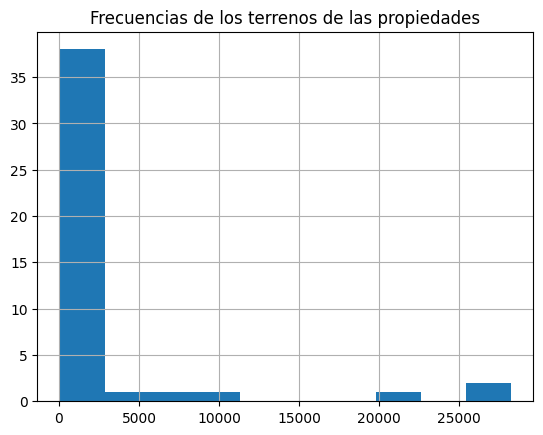

In [14]:
propiedades["terreno"].hist()
plt.title("Frecuencias de los terrenos de las propiedades")
plt.show()

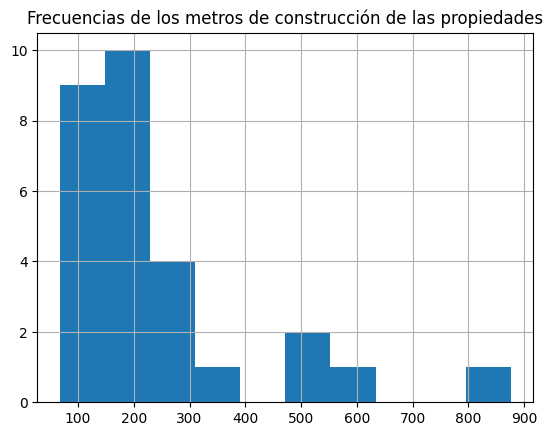

In [15]:
propiedades["construccion"].hist()
plt.title("Frecuencias de los metros de construcción de las propiedades")
plt.show()

In [16]:
propiedades.columns

Index(['alias', 'direccion', 'tipo_de_propiedad', 'amueblado', 'niveles',
       'recamaras', 'banos', 'medios_banos', 'cuarto_de_servicio',
       'estacionamientos', 'terreno', 'frente', 'fondo', 'construccion',
       'forma', 'uso_de_suelo', 'relieve', 'precio', 'mantenimiento', 'estado',
       'antiguedad', 'gravamen', 'descripcion'],
      dtype='object')

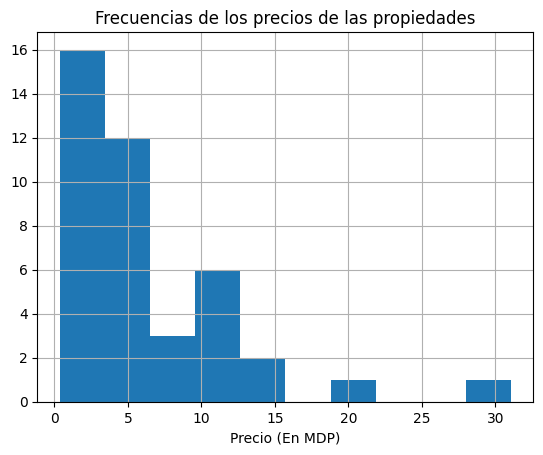

In [18]:
precios = propiedades["precio"] / 1000000
precios[precios< 50].hist()
plt.title("Frecuencias de los precios de las propiedades")
plt.xlabel("Precio (En MDP)")
plt.show()

En la gráfica anterior se excluyen los precios que son outliers

##Correlaciones

In [22]:
propiedades[["terreno", "precio"]].corr()

,terreno,precio
terreno,1.000000,0.508145
precio,0.508145,1.000000


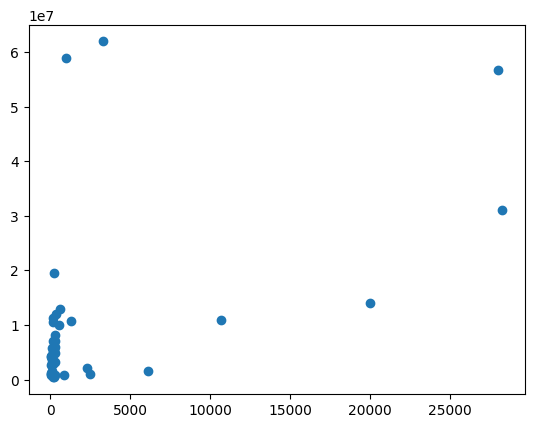

In [20]:
plt.scatter(propiedades["terreno"], propiedades["precio"])

In [38]:
propiedades_con_construccion = propiedades[~propiedades["tipo_de_propiedad"].isin(["terreno"])]
propiedades_con_construccion[["construccion", "precio"]].corr()

,construccion,precio
construccion,1.000000,0.777924
precio,0.777924,1.000000


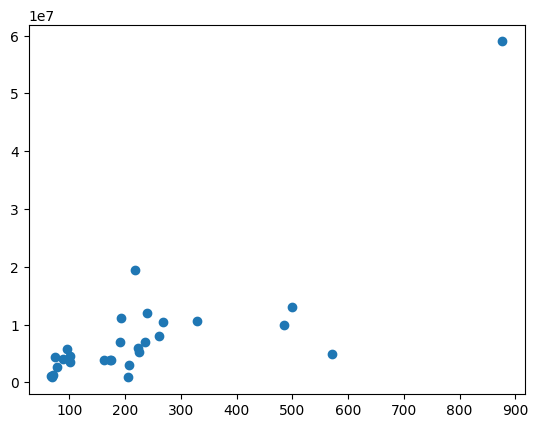

In [39]:
plt.scatter(propiedades_con_construccion["construccion"], propiedades_con_construccion["precio"])

## Conclusiones

Con el análisis anterior se puede concliur que hace falta recolectar un poco más de datos, así como se considera de momento irrelevantes algunos otros. En algunos datos cuantitativos se tendrá que hacer transformación a numérica, como en el estado de una propiedad, poniendo en escala si es regular, bueno, excelente o malo, aunque de momento no se cuente con la descripción de mal estado. De la misma manera, los análisis son muy generales, se debe de tener una vista más particular a cada uno de los tipos de propiedad y clasificar según sus tipos de uso de suelo para poder tener una inferencia. De cualquier modo, la correlación no sirve como métrica para trabajar o evaluar un Chatbot de RAG, por lo que no se profundizará en ese tema.